In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [120]:
video_games = '/Users/marctheshark/Documents/GitHub/Leopard-Shark-Code-Repo/Machine_Learning_Projects/Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv'
mpg = '/Users/marctheshark/Documents/GitHub/Leopard-Shark-Code-Repo/Machine_Learning_Projects/Datasets/auto-mpg.csv'

In [121]:
data = pd.read_csv(video_games) 
mpg_data = pd.read_csv(mpg) 

In [93]:
print(data.shape)

(16719, 16)


In [123]:
mpg_data.shape

(398, 9)

In [124]:
mpg_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [127]:
mpg_data = mpg_data.drop('car name', axis = 1)

KeyError: "['car name'] not found in axis"

In [128]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [129]:
mpg_data = mpg_data.replace('?', np.nan)
mpg_data = mpg_data.dropna()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [95]:
data.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

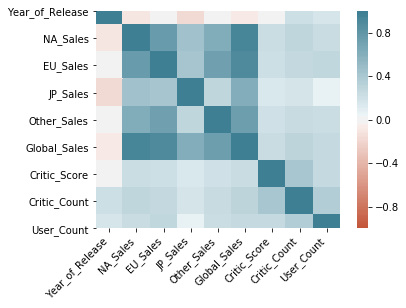

In [96]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


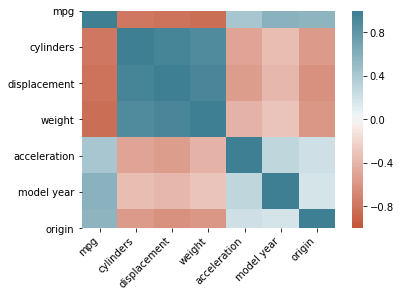

In [130]:
corr = mpg_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [131]:
mpg_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [97]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [133]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [98]:
"""Need to remove the null values from the dataset the result will be a great lose of data"""
clean_data = data.dropna(axis = 0, how ='any') 
  

In [99]:
clean_data.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [100]:
clean_data.shape

(6825, 16)

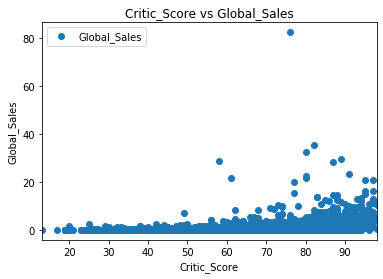

In [101]:
clean_data.plot(x='Critic_Score', y='Global_Sales', style='o')  
plt.title('Critic_Score vs Global_Sales')  
plt.xlabel('Critic_Score')  
plt.ylabel('Global_Sales')  
plt.show()

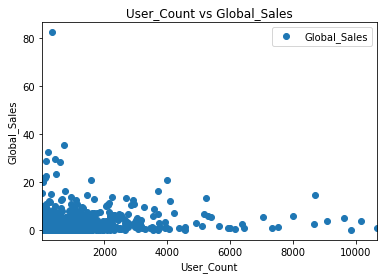

In [102]:
clean_data.plot(x='User_Count', y='Global_Sales', style='o')  
plt.title('User_Count vs Global_Sales')  
plt.xlabel('User_Count')  
plt.ylabel('Global_Sales')  
plt.show()

In [103]:
predictor = clean_data['Global_Sales']

In [104]:
observations = clean_data.drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"], axis = 1)

In [105]:
observations.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E

In [106]:
predictor.head()

0    82.53
2    35.52
3    32.77
6    29.80
7    28.92
Name: Global_Sales, dtype: float64

In [107]:
"""Need to remove the name of the game and create dummy variables for the numerical predictors"""
obs = pd.get_dummies(observations, columns = ['Platform','Year_of_Release','Genre','Publisher','Developer','Rating'])
obs = obs.drop('Name', axis = 1)
obs.head()

Critic_Score  Critic_Count User_Score  User_Count  Platform_3DS  \
0          76.0          51.0          8       322.0             0   
2          82.0          73.0        8.3       709.0             0   
3          80.0          73.0          8       192.0             0   
6          89.0          65.0        8.5       431.0             0   
7          58.0          41.0        6.6       129.0             0   

   Platform_DC  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
0            0            0             0            0            0  ...   
2            0            0             0            0            0  ...   
3            0            0             0            0            0  ...   
6            0            1             0            0            0  ...   
7            0            0             0            0            0  ...   

   Developer_odenis studio  Developer_syn Sophia  Developer_zSlide  Rating_AO  \
0                        0                     0                 0          0   
2                        0                     0                 0          0   
3                        0                     0                 0          0   
6                        0                     0                 0          0   
7                        0                     0                 0          0   

   Rating_E  Rating_E10+  Rating_K-A  Rating_M  Rating_RP  Rating_T  
0         1            0           0         0          0         0  
2         1            0           0         0          0         0  
3         1            0           0         0          0         0  
6         1            0           0         0          0         0  
7         1            0           0         0          0         0  

[5 rows x 1616 columns]

In [108]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Columns: 1616 entries, Critic_Score to Rating_T
dtypes: float64(3), object(1), uint8(1612)
memory usage: 10.8+ MB


In [109]:
#converting types
obs['User_Score'] = obs['User_Score'].astype('float64')

In [110]:
obs.head()

Critic_Score  Critic_Count  User_Score  User_Count  Platform_3DS  \
0          76.0          51.0         8.0       322.0             0   
2          82.0          73.0         8.3       709.0             0   
3          80.0          73.0         8.0       192.0             0   
6          89.0          65.0         8.5       431.0             0   
7          58.0          41.0         6.6       129.0             0   

   Platform_DC  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
0            0            0             0            0            0  ...   
2            0            0             0            0            0  ...   
3            0            0             0            0            0  ...   
6            0            1             0            0            0  ...   
7            0            0             0            0            0  ...   

   Developer_odenis studio  Developer_syn Sophia  Developer_zSlide  Rating_AO  \
0                        0                     0                 0          0   
2                        0                     0                 0          0   
3                        0                     0                 0          0   
6                        0                     0                 0          0   
7                        0                     0                 0          0   

   Rating_E  Rating_E10+  Rating_K-A  Rating_M  Rating_RP  Rating_T  
0         1            0           0         0          0         0  
2         1            0           0         0          0         0  
3         1            0           0         0          0         0  
6         1            0           0         0          0         0  
7         1            0           0         0          0         0  

[5 rows x 1616 columns]

In [111]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Columns: 1616 entries, Critic_Score to Rating_T
dtypes: float64(4), uint8(1612)
memory usage: 10.8 MB


In [136]:
mpg_target = mpg_data['mpg']
mpg_obs = mpg_data.drop('mpg',axis = 1)
mpg_obs.head()

cylinders  displacement horsepower  weight  acceleration  model year  \
0          8         307.0        130    3504          12.0          70   
1          8         350.0        165    3693          11.5          70   
2          8         318.0        150    3436          11.0          70   
3          8         304.0        150    3433          12.0          70   
4          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    obs, predictor, test_size= .15, random_state=10
    )

In [137]:
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = train_test_split(
    mpg_obs, mpg_target, test_size= .15, random_state=10
    )

In [138]:
lr = LinearRegression().fit(X_train, y_train)
lr2 = LinearRegression().fit(mpg_X_train, mpg_y_train)

In [139]:
y_pred = lr.predict(X_test)
mpg_y_pred = lr2.predict(mpg_X_test)

In [119]:
lr.score(X_train, y_train)
#YIKES!

0.42214318444429627

In [140]:
lr2.score(mpg_X_train, mpg_y_train)

0.8291418153071144

In [116]:
mse = mean_squared_error(y_pred, y_test)
mse

1.671609080724666

In [142]:
mse2 = mean_squared_error(mpg_y_pred, mpg_y_test)
mse2

14.25950901790897

In [117]:
math.sqrt(mse)

1.2929072204627314

In [118]:
#So we are 1.23k off from our global sale predictions

In [143]:
math.sqrt(mse2)

3.7761765077799225

In [ ]:
#so we are about 3.77mpg away in average